In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
df=pd.read_csv("/content/dynamic_pricing.csv")
df.head(5)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [56]:
df=pd.get_dummies(df,columns=['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type'])


In [57]:
x=df.drop('Historical_Cost_of_Ride',axis=1)
y=df['Historical_Cost_of_Ride']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

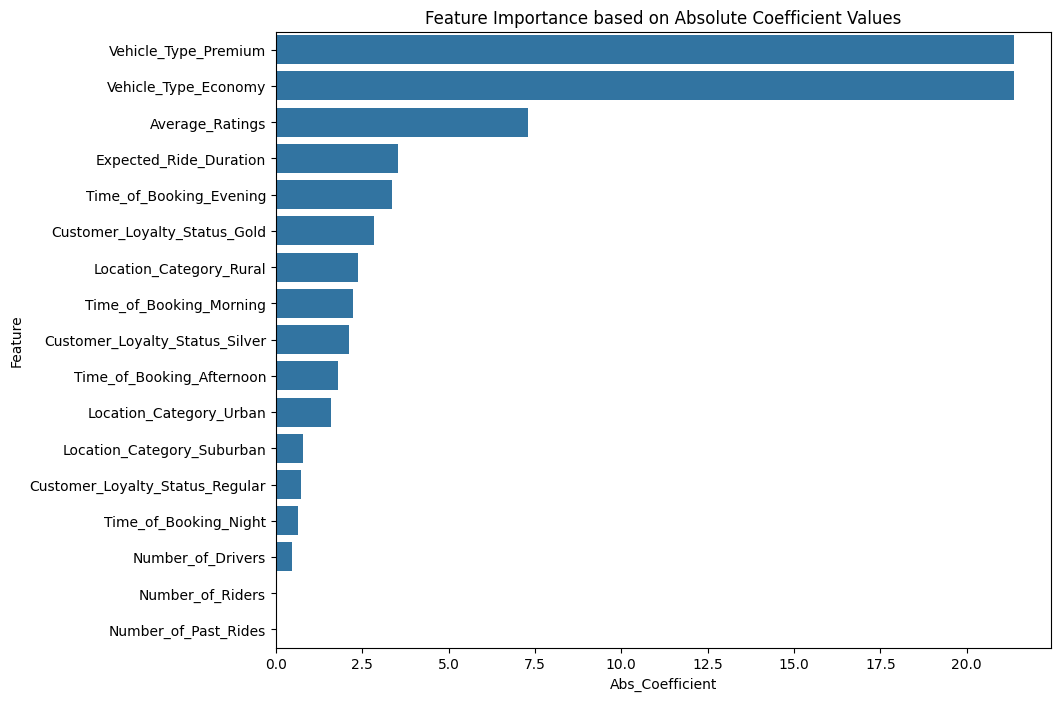

In [58]:
coefficients = lr.coef_
features = x.columns

coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coeff_df)
plt.title('Feature Importance based on Absolute Coefficient Values')
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred)*100)

MSE 4548.600808550965
MAE: 52.56191768454381
RMSE: 67.44331552163612
R2 Score: 87.52468282750773


In [60]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))

In [61]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [62]:
new_row = {
    'Number_of_Riders': [3],
    'Number_of_Drivers': [2],
    'Location_Category': ['Urban'],
    'Customer_Loyalty_Status': ['Silver'],
    'Number_of_Past_Rides': [12],
    'Average_Ratings': [4.1],
    'Time_of_Booking': ['Evening'],
    'Vehicle_Type': ['Economy'],
    'Expected_Ride_Duration': [22]}
test_df=pd.DataFrame(new_row)
test_df=pd.get_dummies(test_df,columns=['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type'])
missing_cols = set(x.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = False
test_df = test_df[x.columns]
pred=loaded_model.predict(test_df)
print(pred)

[62.31406406]
